Dataset - https://www.kaggle.com/ikarus777/best-artworks-of-all-time

In [ ]:
#!pip install opencv-contrib-python

In [1]:
%load_ext autoreload
%autoreload 2
import pandas as pd
import numpy as np
df = pd.read_csv("data/paintings/artists.csv")
df.head()

,id,name,years,genre,nationality,bio,wikipedia,paintings
0,0,Amedeo Modigliani,1884 - 1920,Expressionism,Italian,Amedeo Clemente Modigliani (Italian pronunciat...,http://en.wikipedia.org/wiki/Amedeo_Modigliani,193
1,1,Vasiliy Kandinskiy,1866 - 1944,"Expressionism,Abstractionism",Russian,Wassily Wassilyevich Kandinsky (Russian: Васи́...,http://en.wikipedia.org/wiki/Wassily_Kandinsky,88
2,2,Diego Rivera,1886 - 1957,"Social Realism,Muralism",Mexican,Diego María de la Concepción Juan Nepomuceno E...,http://en.wikipedia.org/wiki/Diego_Rivera,70
3,3,Claude Monet,1840 - 1926,Impressionism,French,Oscar-Claude Monet (; French: [klod mɔnɛ]; 14 ...,http://en.wikipedia.org/wiki/Claude_Monet,73
4,4,Rene Magritte,1898 - 1967,"Surrealism,Impressionism",Belgian,René François Ghislain Magritte (French: [ʁəne...,http://en.wikipedia.org/wiki/René_Magritte,194


In [2]:
df[["name", "genre", "paintings"]].sort_values(by="paintings", ascending=False).head(10)

,name,genre,paintings
8,Vincent van Gogh,Post-Impressionism,877
30,Edgar Degas,Impressionism,702
13,Pablo Picasso,Cubism,439
15,Pierre-Auguste Renoir,Impressionism,336
19,Albrecht Dürer,Northern Renaissance,328
46,Paul Gauguin,"Symbolism,Post-Impressionism",311
16,Francisco Goya,Romanticism,291
31,Rembrandt,Baroque,262
20,Alfred Sisley,Impressionism,259
32,Titian,"High Renaissance,Mannerism",255


In [76]:
df[["genre","name", "paintings"]].set_index(["genre","name"]).sort_index()

paintings
genre                                   name                                
Abstract Expressionism                  Jackson Pollock                   24
Baroque                                 Caravaggio                        55
                                        Diego Velazquez                  128
                                        Peter Paul Rubens                141
                                        Rembrandt                        262
Byzantine Art                           Andrei Rublev                     99
Cubism                                  Pablo Picasso                    439
Early Renaissance                       Sandro Botticelli                164
Expressionism                           Amedeo Modigliani                193
Expressionism,Abstractionism            Vasiliy Kandinskiy                88
Expressionism,Abstractionism,Surrealism Paul Klee                        188
High Renaissance                        Leonardo da Vinci                143
                                        Michelangelo                      49
                                        Raphael                          109
High Renaissance,Mannerism              Titian                           255
Impressionism                           Alfred Sisley                    259
                                        Claude Monet                      73
                                        Edgar Degas                      702
                                        Pierre-Auguste Renoir            336
Impressionism,Post-Impressionism        Camille Pissarro                  91
                                        Henri Matisse                    186
Mannerism                               El Greco                          87
Neoplasticism                           Piet Mondrian                     84
Northern Renaissance                    Albrecht Dürer                   328
                                        Hieronymus Bosch                 137
                                        Jan van Eyck                      81
                                        Pieter Bruegel                   134
Pop Art                                 Andy Warhol                      181
Post-Impressionism                      Georges Seurat                    43
                                        Henri de Toulouse-Lautrec         81
                                        Paul Cezanne                      47
                                        Vincent van Gogh                 877
Primitivism                             Henri Rousseau                    70
                                        Marc Chagall                     239
Primitivism,Surrealism                  Frida Kahlo                      120
Proto Renaissance                       Giotto di Bondone                119
Realism                                 Gustave Courbet                   59
Realism,Impressionism                   Edouard Manet                     90
Romanticism                             Eugene Delacroix                  31
                                        Francisco Goya                   291
                                        William Turner                    66
Social Realism,Muralism                 Diego Rivera                      70
Suprematism                             Kazimir Malevich                 126
Surrealism                              Joan Miro                        102
                                        Salvador Dali                    139
Surrealism,Impressionism                Rene Magritte                    194
Symbolism                               Mikhail Vrubel                   171
Symbolism,Art Nouveau                   Gustav Klimt                     117
Symbolism,Expressionism                 Edvard Munch                      67
Symbolism,Post-Impressionism            Paul Gauguin                     311

In [3]:
df.groupby("genre").sum("paintings")["paintings"].sort_values(ascending=False).head(10)

genre
Impressionism                       1370
Post-Impressionism                  1048
Northern Renaissance                 680
Baroque                              586
Cubism                               439
Romanticism                          388
Symbolism,Post-Impressionism         311
Primitivism                          309
High Renaissance                     301
Impressionism,Post-Impressionism     277
Name: paintings, dtype: int64

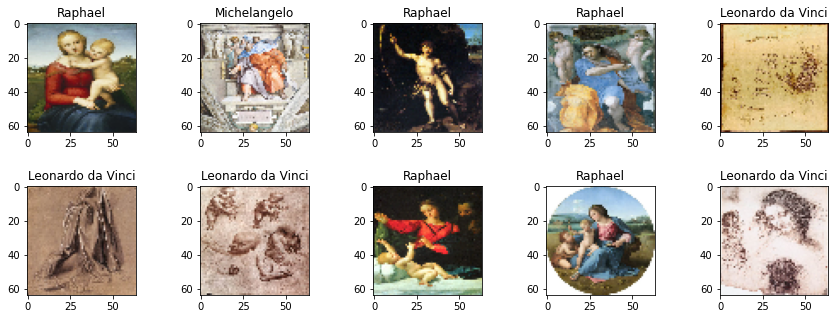

In [94]:
%matplotlib inline
from os import listdir
from os.path import isfile, join
import numpy as np
import cv2
from utils import *
from sklearn.utils import resample
np.random.seed(42)

def get_artists_from_genre(df, genre):
    return df[df["genre"] == genre]["name"].values

def load_data(base_path="data/paintings/images/", 
              authors=[], gray_scale=False,size=(32,32)):
    images = None
    labels = []
    for author in authors:
        loaded_imgs = load_images_from_folder(base_path, gray_scale, size, prefix=author.replace(" ","_"))
        labels += [author for _ in range(len(loaded_imgs))]
        if images is None:
            images = loaded_imgs
        else:
            images = np.vstack((images, loaded_imgs))

    return images, np.array(labels)

size = (64,64)
#images, labels = load_data(size=size, authors=["Pablo Picasso", "Vincent van Gogh"])
images, labels = load_data(size=size, authors=get_artists_from_genre(df, "High Renaissance"))

num_samples = 10
samples = resample(images, labels, n_samples=num_samples, replace=False)

plot_images(samples[0], labels=samples[1], rows=2)

In [95]:
from collections import Counter

def one_vs_all(labels, one):
    Y = np.zeros(len(labels), dtype=int)
    Y[labels == one] = 1
    
    return Y

print(Counter(labels))
X = images_to_2d(images)
target = "Leonardo da Vinci"
Y = one_vs_all(labels, target)

Counter({'Leonardo da Vinci': 143, 'Raphael': 109, 'Michelangelo': 49})


In [96]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.2, random_state=42)

In [102]:
from models import PPCA
ppca = PPCA(100)
ppca.fit(X_train)

z = ppca.project(X_train)
x = ppca.reconstruct(z)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


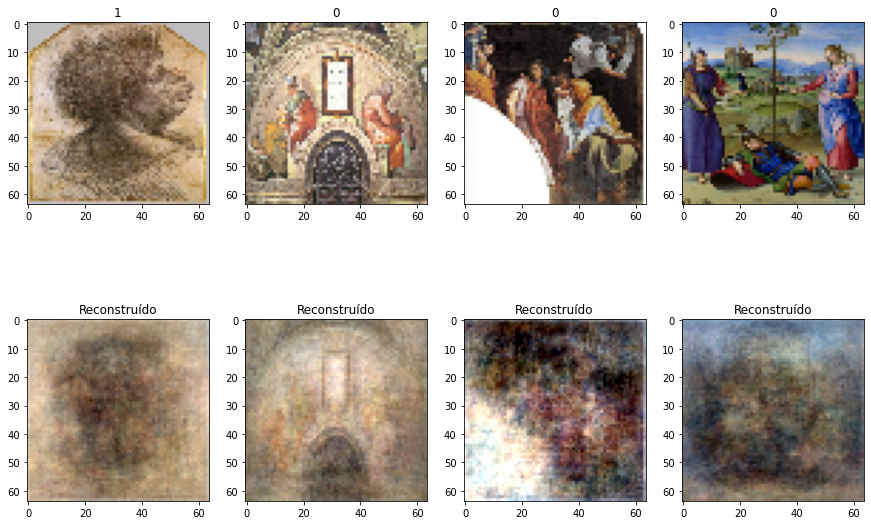

In [103]:
from sklearn.utils import resample

num_samples = 4
samples = resample(X_test, Y_test, n_samples=num_samples, replace=False)

fig = plt.figure(figsize=(15,10))
for n, (img, label) in enumerate(zip(samples[0], samples[1])):
    reconstruct = ppca.reconstruct(ppca.project(img))
    
    plt.subplot(2, num_samples, n+1)
    plt.title(label)
    plt.imshow(vector_to_image(img, size))
    
    plt.subplot(2, num_samples, n+num_samples+1)
    plt.title("Reconstruído")
    plt.imshow(vector_to_image(reconstruct, size))
    
plt.show()

In [104]:
from models import LogisticRegression
model = LogisticRegression()
model.fit(z, Y_train)

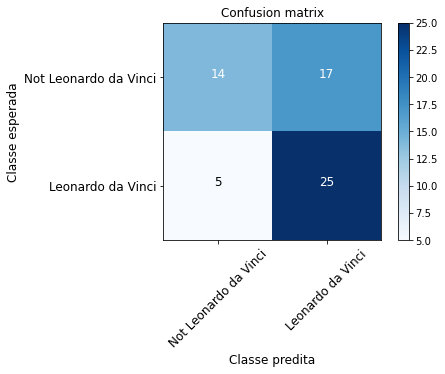

In [105]:
from sklearn.metrics import confusion_matrix
import itertools

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize: # a normalização é usada para saber a porcentagem de acerto por classe
        cm = (cm.astype('float') / cm.sum(axis=1)[:, np.newaxis])
        nan_indexes = np.isnan(cm)
        cm[nan_indexes] = 0

    plt.figure()
    plt.rcParams["axes.grid"] = False
    plt.imshow(cm, cmap=cmap)

    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45, fontsize=12)
    plt.yticks(tick_marks, classes, fontsize=12)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black",
                fontsize=12)

    plt.ylabel('Classe esperada', fontsize=12)
    plt.xlabel('Classe predita', fontsize=12)
    

cm = confusion_matrix(Y_test, model.predict_probit(ppca.project(X_test)))
plot_confusion_matrix(cm, [f"Not {target}",target], normalize=False)

In [107]:
print("Acurácia: ",cm.diagonal().sum()/cm.sum())

Acurácia:  0.639344262295082
